https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset


In [ ]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import statsmodels.api as sm      # biblioteca para pruebas estadísticas.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
mypath = "/content/drive/My Drive/data/bike/day.csv" 

In [ ]:
mydata = pd.read_csv(mypath)
mydata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
mydata.shape

(731, 16)

Para este ejemplo ilustrativo usaremos los factores "atemp" y "cnt" como la variable independiente y dependiente, respectivamente: 

In [ ]:
x = np.array(mydata["atemp"]).astype(np.float)
y = np.array(mydata["cnt"]).astype(np.float)

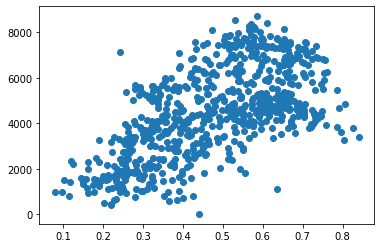

In [ ]:
plt.scatter(x,y)
plt.show()

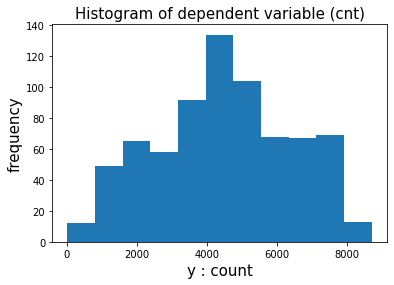

In [ ]:
plt.hist(y, bins=11)
plt.xlabel('y : count',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('Histogram of dependent variable (cnt)',fontsize=15)
plt.show()

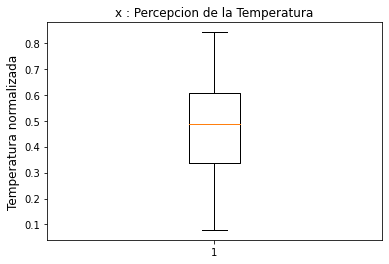

In [ ]:
plt.boxplot(x, vert=True)
plt.title("x : Percepcion de la Temperatura")
plt.ylabel('Temperatura normalizada',fontsize=12)
plt.show()

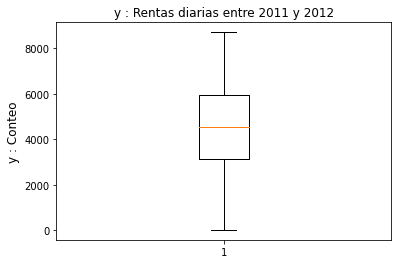

In [ ]:
plt.boxplot(y, vert=True)
plt.title("y : Rentas diarias entre 2011 y 2012")
plt.ylabel('y : Conteo',fontsize=12)
plt.show()

In [ ]:
ccp = np.corrcoef(x,y)  # Coeficiente de correlación de Pearson
print(ccp)

[[1.        0.6310657]
 [0.6310657 1.       ]]


In [ ]:
cd = ccp*ccp   # Coeficiente de determinación
print(cd)

[[1.         0.39824392]
 [0.39824392 1.        ]]


In [ ]:
cda = 1 - (len(x)-1) * (1-cd) / (len(x)-1-1)
print(cda)

[[1.         0.39741846]
 [0.39741846 1.        ]]


Apliquemos el método de mínimos cuadrados.

Para ello agregamos primeramente la columna de 1s al vector de entrada X:

In [ ]:
vx = np.vstack( [x, np.ones(len(x))] ).T

In [ ]:
pendiente, ordenada = np.linalg.lstsq(vx, y)[0]

In [ ]:
print(pendiente)
print(ordenada)

7501.833949516507
945.8239810984919


Generamos las estimaciones de la variable depediente con el modelo generado y graficamos la recta de regresi+on:

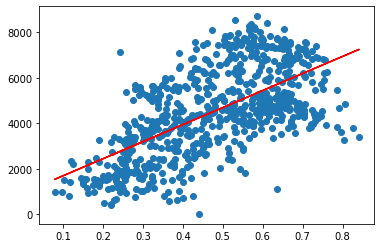

In [ ]:
ygorro = x * pendiente + ordenada
plt.plot(x, ygorro, color='r')
plt.scatter(x,y)
plt.show()

Resumen numérico de cada variable:

In [ ]:
def resumenNumerico(x):
  minimo = np.min(x)
  q1 = np.percentile(x,25)
  mediana = np.median(x)
  media = np.mean(x)
  q3 = np.percentile(x, 75)
  maximo = np.max(x)

  print("min=" + str(minimo) + 
        "\nQ1=" + str(q1) + 
        "\nmediana=" + str(mediana) + 
        "\nmedia=" + str(media) + 
        "\nQ3=" + str(q3) + 
        "\nmaximo=" + str(maximo))

In [ ]:
resumenNumerico(x)

min=0.0790696
Q1=0.3378425
mediana=0.48673299999999997
media=0.47435398864569084
Q3=0.6086020000000001
maximo=0.8408959999999999


In [ ]:
resumenNumerico(y)

min=22.0
Q1=3152.0
mediana=4548.0
media=4504.3488372093025
Q3=5956.0
maximo=8714.0


# Podemos obtener mayor información del modelo mediante la librería STATSMODELS:

In [ ]:
xones = sm.add_constant(x)  # También podemos usar vx definida anteriormente.
print(xones)

[[1.       0.363625]
 [1.       0.353739]
 [1.       0.189405]
 ...
 [1.       0.2424  ]
 [1.       0.2317  ]
 [1.       0.223487]]


In [ ]:
mimodelo = sm.OLS(y, xones).fit()

In [ ]:
print(mimodelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.85e-82
Time:                        23:26:13   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7501.8339    341.538     21.965      0.0

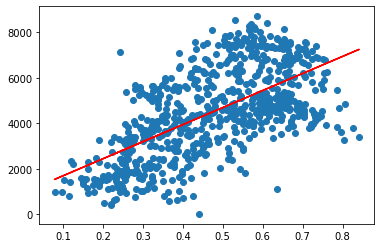

In [ ]:
b0, b1 = mimodelo.params  # b0:ordenada en el origen, b1:pendiente

ygorro = b0 + b1 * x
plt.plot(x, ygorro, color='r')
plt.scatter(x,y)
plt.show()